# Clustering Analysis

## Task 1: Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('eastwestairlines.xlsx')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 12)

In [5]:
# checking for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [36]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

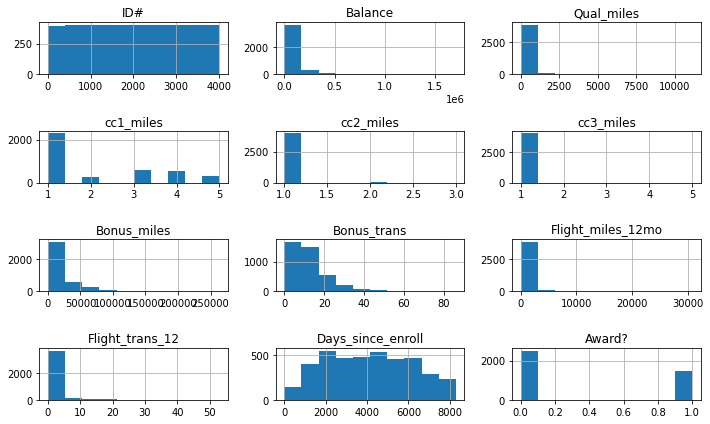

In [7]:
df.hist(figsize=(10, 6))  # Histogram for all numerical features
plt.tight_layout()
plt.show()

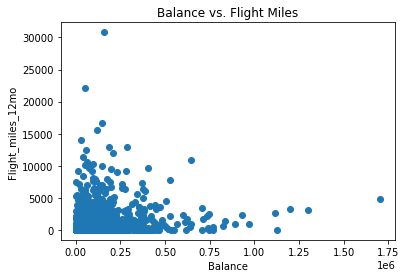

In [9]:
plt.scatter(df['Balance'], df['Flight_miles_12mo'])  #scatter plot
plt.xlabel('Balance')
plt.ylabel('Flight_miles_12mo')
plt.title('Balance vs. Flight Miles')
plt.show()

<AxesSubplot:>

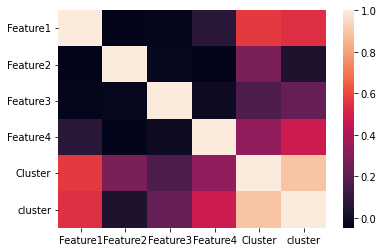

In [54]:
import seaborn as sns
sns.heatmap(df.corr())

In [11]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [39]:
df.columns

Index(['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Cluster', 'cluster'], dtype='object')

## Task 2: Implementing Clustering Algorithms:

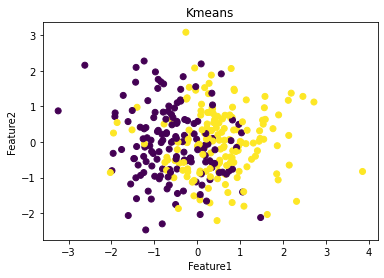

In [162]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)

df['cluster'] = kmeans.labels_ # Predict cluster labels for each data point

# visulatization
plt.scatter(df['Feature1'], df['Feature2'], c=df['cluster'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title("Kmeans")
plt.show()


**Kmeans cluster for 3 clusters**

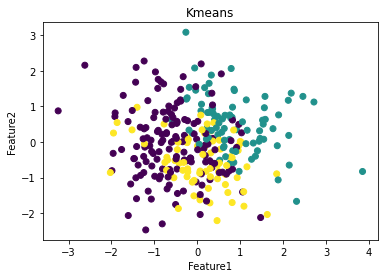

In [161]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

df['cluster'] = kmeans.labels_ # Predict cluster labels for each data point

# visulatization
plt.scatter(df['Feature1'], df['Feature2'], c=df['cluster'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title("Kmeans")
plt.show()

**Hierarchical clustering**

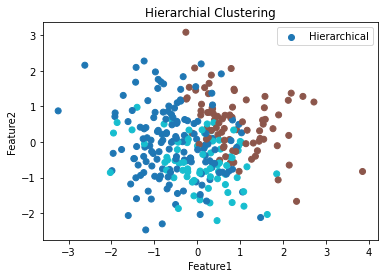

In [159]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

model_hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward') 
#ward minimizes the varience within cluster , complete (maximum distance between datapoints of different clusters),single(minimum distance between clusters ) , average(avg distance between clustrs)
model_hierarchical.fit(df_scaled)
cluster_labels_hierarchical = model_hierarchical.labels_

plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster_labels_hierarchical, cmap="tab10" ,label='Hierarchical')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Hierarchial Clustering')
plt.legend()
plt.show()

**DBSCAN**

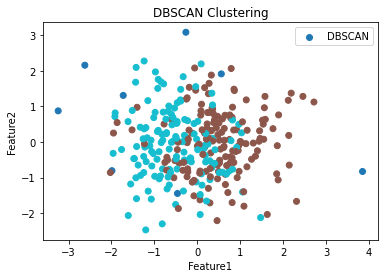

In [160]:
model_dbscan = DBSCAN(eps=1.5, min_samples=5)
# eps specifies the min distance between 2 datapoints so that at which they can be considered as neighbours
# min_samples is the num of datapoints within the eps distance to consider it as a core point
model_dbscan.fit(df_scaled)
cluster_labels_dbscan = model_dbscan.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster_labels_dbscan, cmap="tab10", label='DBSCAN')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

**Evaluation and Performance Metrics:**


In [155]:
from sklearn.metrics import silhouette_score

# Silhouette score for KMeans
silhouette_kmeans = silhouette_score(X, df["cluster"])
print("silhouette score for Kmean", silhouette_kmeans)

# Silhouette score for DBSCAN
silhouette_dbscan = silhouette_score(X,cluster_labels_dbscan)
print("silhoutte score for DBSCAN", silhouette_dbscan)

silhouette score for Kmean 0.14766460040828017
silhoutte score for DBSCAN 0.13301840550548197


In [154]:
# both the silhoutte score is very less which means there is weak cluster seperation i.e datapoints may overlap on each other
#silhoutte score ranges between (-1 to 1)